# Preparation for training
## Feature Scaling
In machine learning, feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. The goal of feature scaling is to ensure that each feature contributes equally to the distance computations in algorithms that rely on distance metrics, such as k-nearest neighbors (KNN) and support vector machines (SVM).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from cpt_to_soiltype.preprocess_funcs import get_dataset, split_drillhole_data

In [12]:
def plot_boxplots(X, features):
    """
    Plots box plots for each feature in the dataset.

    Parameters:
    X (DataFrame): The input features.
    features (list): List of feature names.
    """
    # collect data for each feature
    data = [X[feat].dropna().values for feat in features]

    # single axes for all boxplots
    fig, ax = plt.subplots(figsize=(max(8, 1.2 * len(features)), 6))

    ax.boxplot(data, labels=features, vert=True, patch_artist=True)
    ax.set_xticklabels(features, rotation=45, ha='right')
    ax.set_ylabel('Value')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()


def plot_histograms(X, features, bins=30):
    """
    Plots histograms for each feature in the dataset.

    Parameters:
    X (DataFrame): The input features.
    features (list): List of feature names.
    bins (int): Number of bins for the histogram.
    """
    n_features = len(features)
    n_cols = 3
    n_rows = int(np.ceil(n_features / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    for i, feat in enumerate(features):
        axes[i].hist(X[feat].dropna(), bins=bins, color='skyblue', edgecolor='black')
        axes[i].set_title(feat)
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(axis='y', linestyle='--', alpha=0.5)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


def plot_violin(X, features):
    """
    Plots violin plots for each feature in the dataset using Matplotlib only.
    All violins are displayed in a single plot with different x-tick labels.

    Parameters:
    X (DataFrame): The input features.
    features (list): List of feature names.
    """
    # Collect data for each feature
    data = [X[feat].dropna().values for feat in features]

    # Single axes for all violins
    fig, ax = plt.subplots(figsize=(max(8, 1.2 * len(features)), 6))

    # Create violin plots for all features
    positions = range(1, len(features) + 1)
    vp = ax.violinplot(data, positions=positions, showmeans=False, showmedians=True)

    # Style the violins
    for pc in vp['bodies']:
        pc.set_facecolor('lightgreen')
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)
    
    if 'cmedians' in vp:
        vp['cmedians'].set_edgecolor('black')
        vp['cmedians'].set_linewidth(1)
    if 'cbars' in vp:
        vp['cbars'].set_edgecolor('black')
    if 'cmins' in vp:
        vp['cmins'].set_edgecolor('black')
    if 'cmaxes' in vp:
        vp['cmaxes'].set_edgecolor('black')

    # Set x-tick labels and formatting
    ax.set_xticks(positions)
    ax.set_xticklabels(features, rotation=45, ha='right')
    ax.set_ylabel('Value')
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

loading the data

In [8]:
FEATURES = ['Depth (m)', 'qc (MPa)', 'fs (kPa)','Rf (%)', 'σ,v (kPa)', 'u0 (kPa)',"σ',v (kPa)", 'Qtn (-)', 'Fr (%)']
LABELS = ['Oberhollenzer_classes']

df = get_dataset("../data/raw/CPT_PremstallerGeotechnik_revised.csv")
train_df, test_df = split_drillhole_data(df, id_column="ID",train_fraction=0.75)

X_train = train_df[FEATURES]
X_test = test_df[FEATURES]
y_train = train_df[LABELS]
y_test = test_df[LABELS]

C:\Users\SjB\git\course-machine-learning-for-geotechnics\src\cpt_to_soiltype\preprocess_funcs.py:14: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_file, header=0, sep=",")


Visualizing the training data features with box plots

C:\Users\SjB\AppData\Local\Temp\ipykernel_38200\2352481083.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=features, vert=True, patch_artist=True)


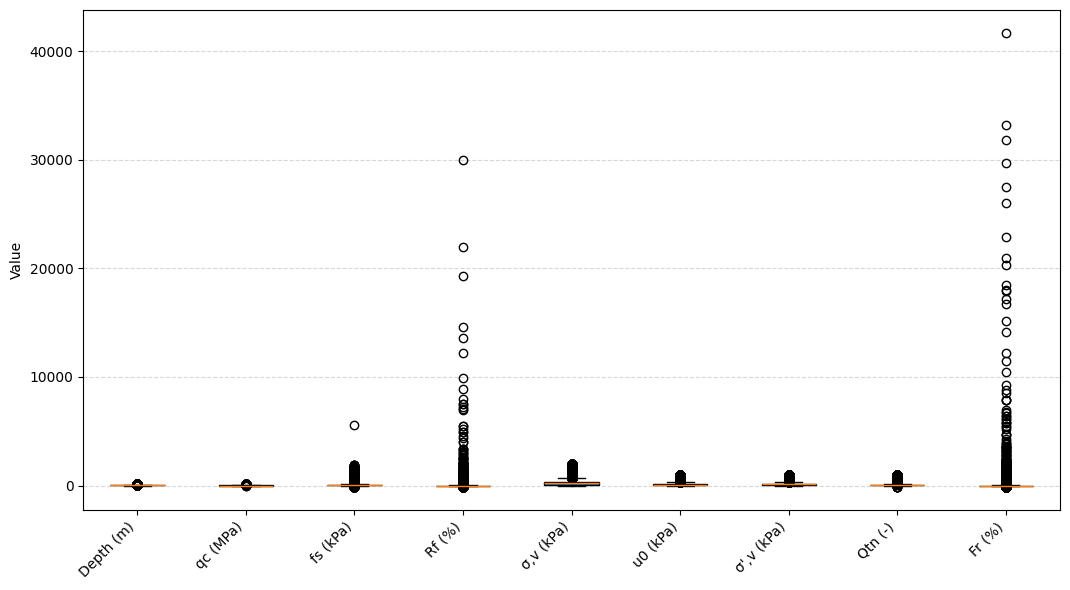

In [17]:
plot_boxplots(X_train, FEATURES)

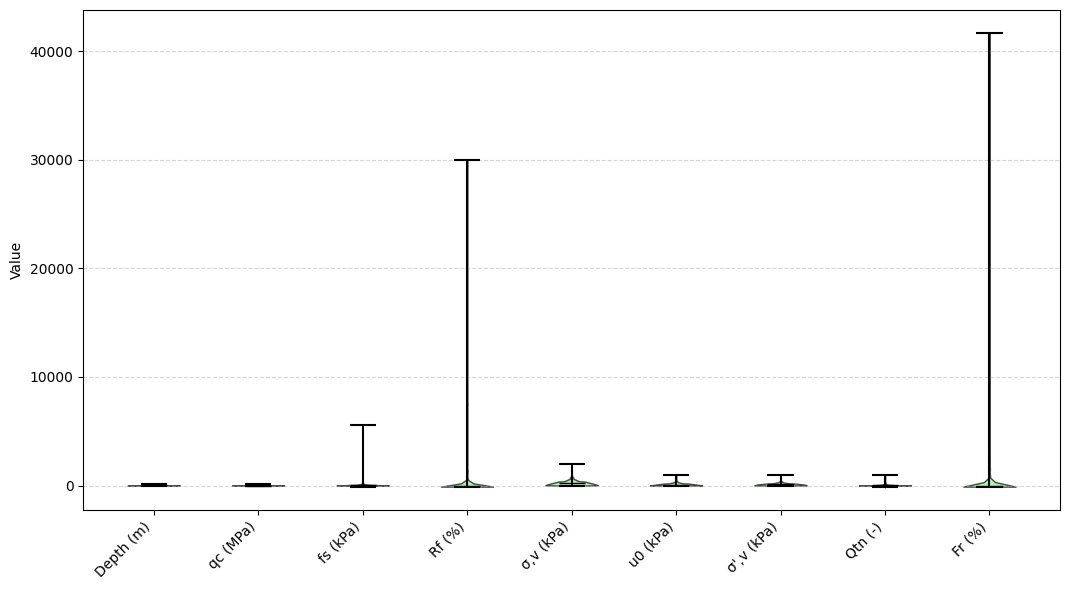

In [13]:
plot_violin(X_train, FEATURES)

## Min-max scaling
Min-max scaling (or normalization) transforms the data into a fixed range, usually 0 to 1. This is done by subtracting the minimum value of each feature from the data points and then dividing by the range (maximum - minimum).

C:\Users\SjB\AppData\Local\Temp\ipykernel_38200\2352481083.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=features, vert=True, patch_artist=True)


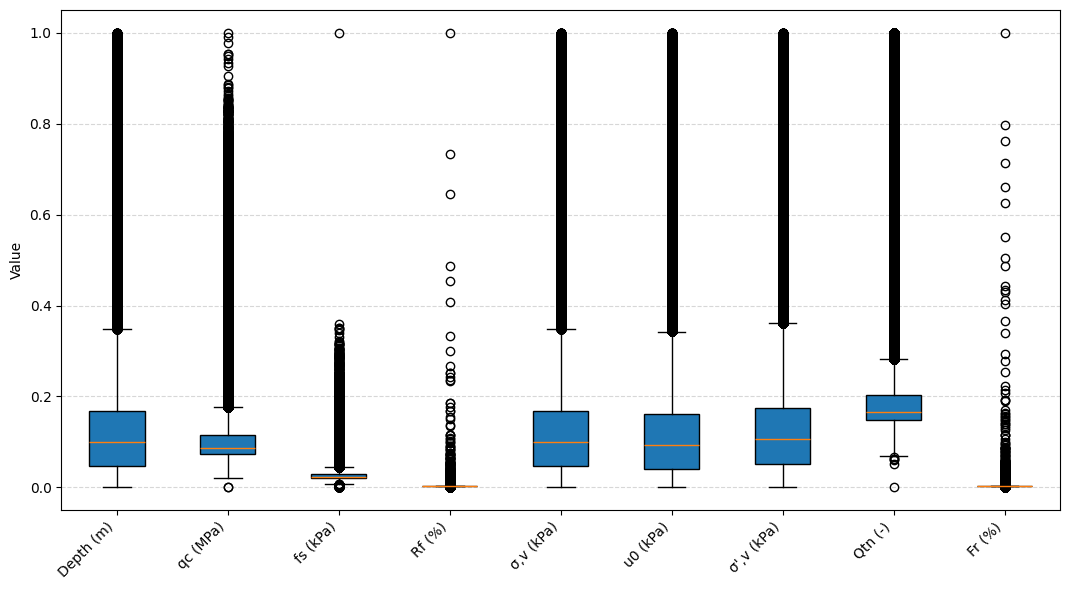

In [ ]:
df_scaled_mm = X_train.copy()
scaler = MinMaxScaler()
df_scaled_mm[FEATURES] = scaler.fit_transform(X_train[FEATURES])
plot_boxplots(df_scaled_mm, FEATURES)

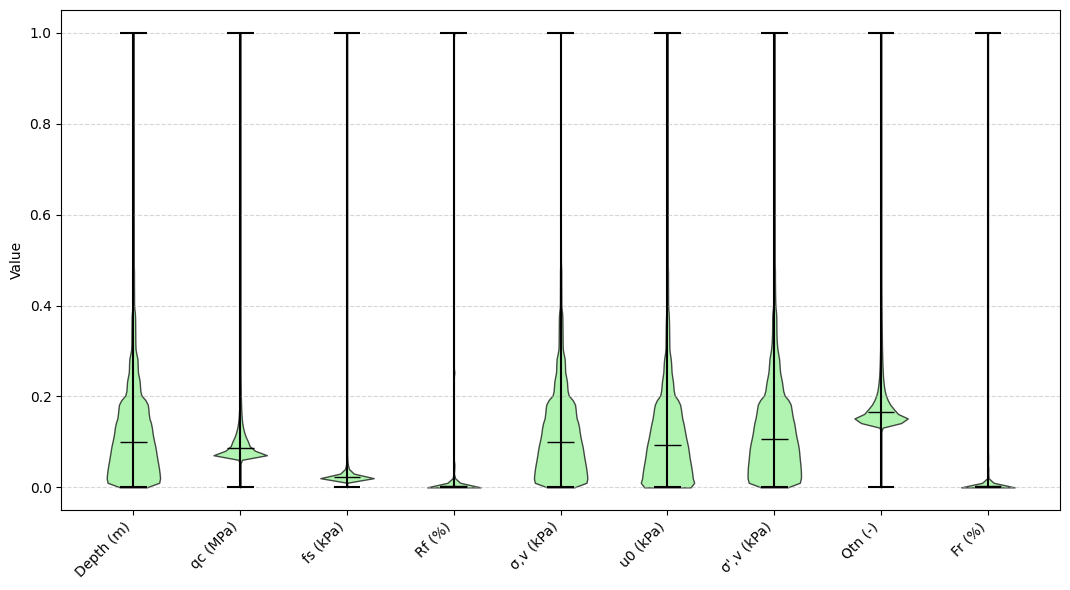

In [16]:
plot_violin(df_scaled, FEATURES)

## Standard scaling
Standard scaling (or z-score normalization) transforms the data such that the distribution has a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of each feature from the data points and then dividing by the standard deviation.

C:\Users\SjB\AppData\Local\Temp\ipykernel_38200\2352481083.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=features, vert=True, patch_artist=True)


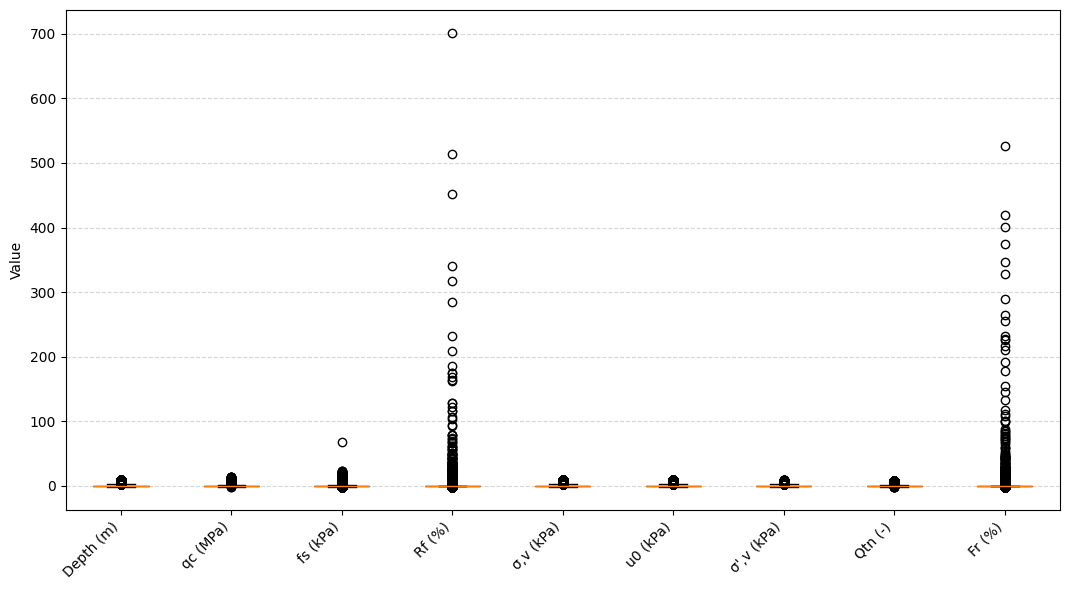

In [19]:
df_scaled_std = X_train.copy()
scaler = StandardScaler()
df_scaled_std[FEATURES] = scaler.fit_transform(X_train[FEATURES])
plot_boxplots(df_scaled_std, FEATURES)

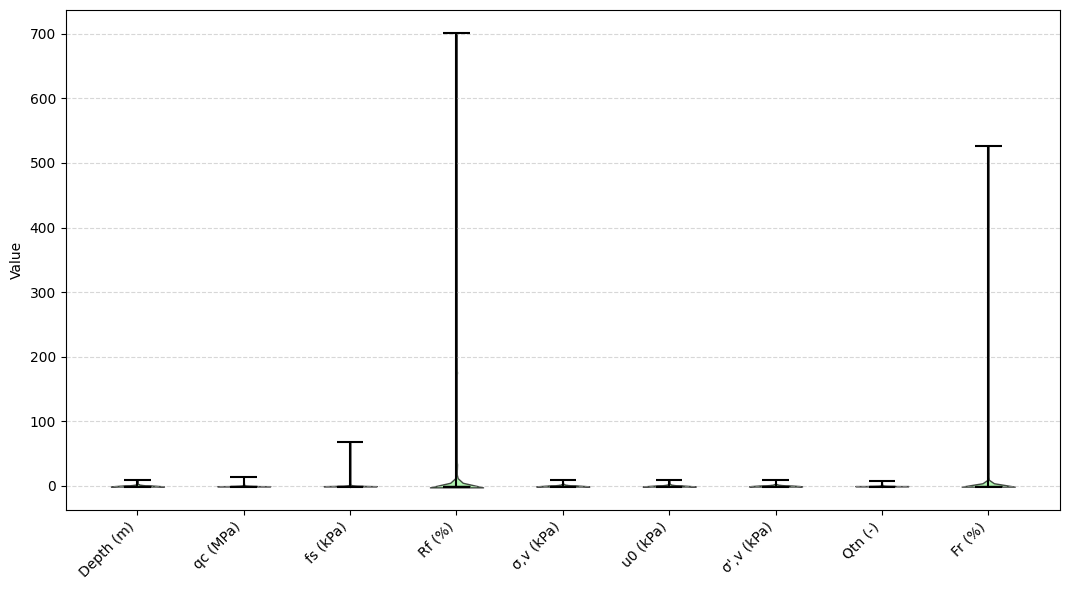

In [20]:
plot_violin(df_scaled_std, FEATURES)

## Categorical labels

The Oberhollenzer dataset already has encoded the soil types as integers. However, in many cases, categorical labels need to be converted into a numerical format that machine learning algorithms can understand. This is often done using techniques such as one-hot encoding or label encoding.

In [ ]:
print(df[LABELS])

        Oberhollenzer_classes
0                         4.0
1                         4.0
2                         4.0
3                         4.0
4                         4.0
...                       ...
890420                    1.0
890421                    1.0
890422                    1.0
890423                    1.0
890424                    1.0

[890425 rows x 1 columns]


# Outliers

Lets apply some basic filtering to remove some obvious outliers in the dataset. Outliers can significantly affect the performance of machine learning models, especially those that are sensitive to the scale of the data. Common methods for handling outliers include removing them, transforming them, or using robust scaling techniques.

In [ ]:
# Preprocessing

# Preprocessed data

Let's visualize the preprocessed data to see the effects of scaling and outlier removal.

## Min-max scaled data

In [ ]:
df_preprocessed_scaled_mm = X_train_preprocessed.copy()
scaler = MinMaxScaler()
df_preprocessed_scaled_mm[FEATURES] = scaler.fit_transform(X_train_preprocessed[FEATURES])
plot_boxplots(df_preprocessed_scaled_mm, FEATURES)

In [ ]:
# Violin plot of min-max scaled data
plot_violin(df_preprocessed_scaled_mm, FEATURES)

## Standard scaled data

In [ ]:
df_preprocessed_scaled_std = X_train_preprocessed.copy()
scaler = StandardScaler()
df_preprocessed_scaled_std[FEATURES] = scaler.fit_transform(X_train_preprocessed[FEATURES])
plot_boxplots(df_preprocessed_scaled_std, FEATURES)

In [ ]:
# Violin plot of standard scaled data
plot_violin(df_preprocessed_scaled_std, FEATURES)